SRI NAGA SAI SUSHMA KONDABOLU

# SUBMISSION FOR HW 2

# HW-2

## Instructions

* Your solutions should include all of the code necessary to answer the problems. All of your code should run (assuming the data is available). Make sure that you answer all
parts of the problems.
* Submit your solutions on Canvas by the deadline displayed online. 
* Put your name and title for your notebook in the top (text) cell of the notebook.
* Any written responses should appear outside of code blocks and use Markdown for text formatting. Code comments are encouraged, but will be ignored for grading purposes. 
* Solutions that are especially difficult to grade due to poor formatting will not receive full credit.
* All solutions to the given problems must be your own work. If you use third-party code for ancillary tasks, you must cite them.


# Part A

* Problems A.1 & A.2 correspond to the “Miniposter” assignment on Canvas, and ask you to provide the code that you used to import, tidy, and visualize the dataset that you used for your “Miniposter”.

## Problem A.1

Find a dataset that is personally interesting to you. It may be a publicly-available dataset, or a dataset for which you have permission to use and share results. There are many places online to find publicly-available dataset, and simply searching Google for your preferred topic plus “public dataset” may provide many hits. Here some additional resources to get you started:
* US Government datasets (https://catalog.data.gov/dataset)
* Center for Disease Control (CDC) data (https://data.cdc.gov)
* Bureau of Labor Statistics (https://www.bls.gov/data/)
* NASA datasets (https://nssdc.gsfc.nasa.gov)
* World Bank Open Data (https://data.worldbank.org)
* Kaggle Datasets (https://www.kaggle.com/datasets)
* This should be the same dataset that you use for the "Miniposter" assignment. It does not have to be the same dataset you will use for your team project later in the semester.*

Import the dataset into Colab, tidy the dataset (if necessary, and print the first several lines of the dataset.
Describe the dataset and its variables. Comment on whether you had to tidy the dataset, and how you tidied the data (if you did).

At a minimum, your slide should include:
1. Your name
2. A descriptive title
3. At least 2 figures visualizing the data
4. Captions providing interpretations of your figures
5. A citation for the data source

## Problem A.2

Create visualizations to identify interesting or unexpected relationships in the dataset. After performing your analysis, present your results by creating an attractive "Miniposter" slide using PowerPoint, Keynote, or similar program. Submit your slide to the "Miniposter" assignment on Canvas.
In your homework solutions, reproduce the plots from your "Miniposter" figures, and provide your interpretations of them.

A1 and A2

The dataset consists of data of around 6000 users of a telecom company offering Phone and Internet service. It consists of 22 columns of data which focus on the Churn of users of the company. The dataset takes into consideration several factors such as the gender, tenure, contract type, churn and services used by the customer. Since, the data doesn't have any blank values or extreme ranges, there is no need to tidy it.

A brief description on the different variables in the dataset is below:

customerID - customer id


gender - client gender (male / female)



SeniorCitizen - is the client retired (1, 0)


Partner - is the client married (Yes, No)


tenure - how many months a person has been a client of the company


PhoneService - is the telephone service connected (Yes, No)


MultipleLines - are multiple phone lines connected (Yes, No, No phone service)


InternetService - client's Internet service provider (DSL, Fiber optic, No)


OnlineSecurity - is the online security service connected (Yes, No, No internet service)


OnlineBackup - is the online backup service activated (Yes, No, No internet service)


DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)


TechSupport - is the technical support service connected (Yes, No, No internet service)


StreamingTV - is the streaming TV service connected (Yes, No, No internet service)


StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)


Contract - type of customer contract (Month-to-month, One year, Two year)


PaperlessBilling - whether the client uses paperless billing (Yes, No)


PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


MonthlyCharges - current monthly payment


TotalCharges - the total amount that the client paid for the services for the entire time


Churn - whether there was a churn (Yes or No)

In [52]:
#A1
#Importing the file from Github link
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/sushma-kondabolu/telecomdatafile/main/telecom_users_data.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5982,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5983,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5984,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [53]:

#Checking if there are any null rows in the data, so that they can be dropped
df.isnull().sum()
#since there are rows with null data, drop function is not required

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

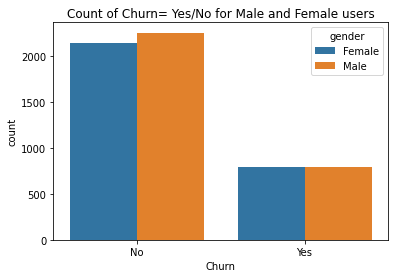

In [54]:
sns.countplot(data=df, x="Churn", hue="gender").set(title="Count of Churn= Yes/No for Male and Female users");

There is identical trend of Churn among Male and Female users. So, this data isn't much useful to predict Churn inclination for a specific gender.

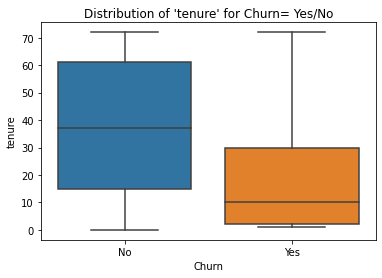

In [55]:
sns.boxplot(x="Churn", y="tenure", data=df).set(title="Distribution of 'tenure' for Churn= Yes/No");

People that are long term clients of the company are less likely to leave the services provided by the company.

In [56]:

df1 = df[['Contract', 'Churn']]
# Group Churn and contract types and count numbers
df_grouped = df1.groupby(['Contract', 'Churn']).size().reset_index()
# Create a pivot table
table = pd.pivot_table(df_grouped, index=['Churn'], columns=['Contract'])

table

0                  
Contract Month-to-month One year Two year
Churn                                    
No                 1871     1128     1400
Yes                1398      148       41

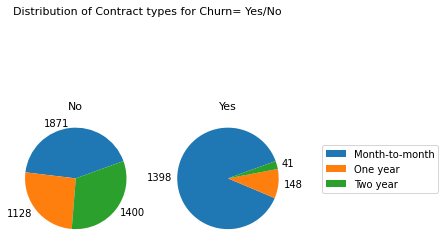

In [57]:
        
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

        
for i, (index1, row) in enumerate(table.head(8).iterrows()):
    ax = axes[i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row,labels=row.values, startangle=20)
    ax.set_title(index1, fontsize=11)
    
    legend = plt.legend([x[1] for x in row.index], bbox_to_anchor=(1.2, .80), loc='upper left', ncol=1, fancybox=True)

fig.subplots_adjust(wspace=.2)
title = fig.suptitle('Distribution of Contract types for Churn= Yes/No',fontsize=11)    

From the pie chart, though 
the volume of users with 
Month-to-month contract 
are greater in number for 
Churn= No, they are the 
highest in number among 
the users who churn. This 
also tells that long term 
plans retain customers; 
the company must work 
on creating attractive longterm plans.

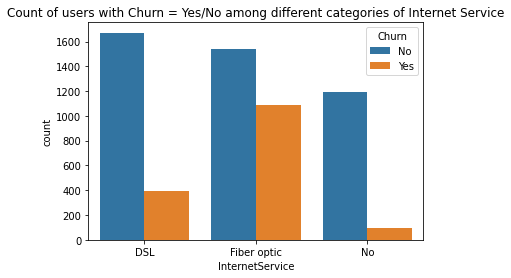

In [58]:

sns.countplot(x="InternetService", hue="Churn", data=df).set(title="Count of users with Churn = Yes/No among different categories of Internet Service");


Highest Churn =Yes numbers are for Fiber Optic type 
of Internet Service provided by the company. It can 
be inferred that the company should work on 
bettering Fiber Optic services to prevent Churn of 
users.


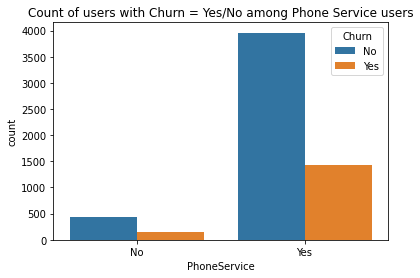

In [59]:
sns.countplot(x="PhoneService", hue="Churn", data=df).set(title="Count of users with Churn = Yes/No among Phone Service users");

Nearly one-third of users with Phone service are 
churning out. The existing plans of the company 
aren’t motivating the users to stay.

# Part B

* Problems B.1-B3 use data on [NCAA student-athlete academic performance](https://www.ncaa.org/about/resources/research/shared-ncaa-research-data). 
* The following files include the codebook and tab-delimited data for team-level Academic Progress Rates (APRs) of Division I student-athletes from 2003-2014.
  * https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv
  * https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019Codebook.pdf

A team’s APR is calculated out of a maximum score of 1000 points, and takes into account a team’s academic eligibility and retention, to derive an overall cohort rate of academic progress.

In [60]:
import pandas as pd

url='https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv'
df = pd.read_csv(url)
df

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,SCL_HBCU,SCL_PRIVATE,DATA_TAB_MULTIYRRATE,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,RAW_OR_CI,MULTIYR_SQUAD_SIZE,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,DATA_TAB_ANNUALRATE,APR_RATE_2019_1000,ELIG_RATE_2019,RET_RATE_2019,NUM_OF_ATHLETES_2019,APR_RATE_2018_1000,ELIG_RATE_2018,RET_RATE_2018,NUM_OF_ATHLETES_2018,APR_RATE_2017_1000,ELIG_RATE_2017,RET_RATE_2017,NUM_OF_ATHLETES_2017,APR_RATE_2016_1000,ELIG_RATE_2016,RET_RATE_2016,NUM_OF_ATHLETES_2016,APR_RATE_2015_1000,ELIG_RATE_2015,RET_RATE_2015,...,APR_RATE_2009_1000,ELIG_RATE_2009,RET_RATE_2009,NUM_OF_ATHLETES_2009,APR_RATE_2008_1000,ELIG_RATE_2008,RET_RATE_2008,NUM_OF_ATHLETES_2008,APR_RATE_2007_1000,ELIG_RATE_2007,RET_RATE_2007,NUM_OF_ATHLETES_2007,APR_RATE_2006_1000,ELIG_RATE_2006,RET_RATE_2006,NUM_OF_ATHLETES_2006,APR_RATE_2005_1000,ELIG_RATE_2005,RET_RATE_2005,NUM_OF_ATHLETES_2005,APR_RATE_2004_1000,ELIG_RATE_2004,RET_RATE_2004,NUM_OF_ATHLETES_2004,DATATAB_PUBLICAWARD,PUB_AWARD_20,PUB_AWARD_19,PUB_AWARD_18,PUB_AWARD_17,PUB_AWARD_16,PUB_AWARD_15,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06
0,NaN,100654,Alabama A&M University,1,Baseball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,Y,N,NaN,923.0,948.0,923.0,raw,81.0,0.900621,0.914474,NaN,947.0,0.947368,0.945946,19.0,907.0,0.909091,0.904762,22.0,920.0,0.897436,0.916667,20.0,922.0,0.850000,0.891892,20.0,798.0,0.714286,0.857143,...,969.0,0.843750,1.000000,16.0,938.0,0.937500,0.937500,16.0,953.0,0.906250,1.000000,16.0,923.0,0.897436,0.948718,21.0,917.0,0.880952,0.952381,21.0,975.0,0.97500,0.975000,20.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,Y,N,NaN,908.0,941.0,908.0,raw,49.0,0.870968,0.923077,NaN,867.0,0.875000,0.857143,13.0,976.0,0.900000,1.000000,11.0,870.0,0.826087,0.913043,12.0,923.0,0.884615,0.923077,13.0,886.0,0.722222,1.000000,...,844.0,0.875000,0.812500,8.0,915.0,0.916667,0.913043,12.0,964.0,0.964286,0.964286,14.0,923.0,0.961538,0.846154,13.0,909.0,0.909091,0.909091,11.0,950.0,0.95000,0.950000,10.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100654,Alabama A&M University,4,Football,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,Y,N,NaN,924.0,938.0,924.0,raw,316.0,0.900515,0.932759,NaN,900.0,0.889655,0.909722,78.0,944.0,0.923077,0.936620,76.0,942.0,0.912162,0.952381,82.0,912.0,0.877551,0.931973,80.0,881.0,0.793548,0.948387,...,935.0,0.909091,0.946565,74.0,930.0,0.901639,0.950000,64.0,919.0,0.859060,0.979866,75.0,941.0,0.911111,0.962963,70.0,921.0,0.875862,0.965517,74.0,871.0,0.86014,0.881119,74.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,Y,N,NaN,896.0,946.0,946.0,ci,21.0,0.871795,0.921053,NaN,962.0,1.000000,0.923077,7.0,1000.0,1.000000,1.000000,4.0,NaN,NaN,NaN,NaN,739.0,0.666667,0.818182,7.0,778.0,0.777778,0.777778,...,857.0,0.857143,0.857143,4.0,1000.0,0.900000,1.000000,5.0,1000.0,1.000000,1.000000,4.0,889.0,0.888889,0.888889,5.0,929.0,0.857143,1.000000,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,Y,N,NaN,1000.0,1000.0,1000.0,ci,21.0,1.000000,1.000000,NaN,1000.0,1.000000,1.000000,7.0,1000.0,1.000000,1.000000,5.0,1000.0,1.000000,1.000000,6.0,NaN,NaN,NaN,NaN,818.0,0.833333,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889.0,0.888889,0.888889,5.0,1000.0,1.000000,1.000000,4.0,958.0,1.00000,0.916667,6.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...

# Problem B.1

Create a tidy dataframe with the following columns: School ID,  School name, Sport code, Sport name, Year, APR.

The Year is encoded in column names of the form `APR_RATE_YYYY_1000`, where `YYYY` is the 4-digit year. And these columns also contain the APR (Academic Performance Rating) on a scale of 1 to 1000. Data are available for years 2004 to 2019 (as of May 2021).

Remove rows with missing values and report the number of rows removed.

Use your tidied dataset to visualize the distributions of APRs over time. How does the distribution of APRs change year-to-year from 2004 to 2014?

In [61]:
tidy_df=df[['SCL_UNITID','SCL_NAME','SPORT_CODE','SPORT_NAME','APR_RATE_2004_1000','APR_RATE_2005_1000','APR_RATE_2006_1000','APR_RATE_2007_1000','APR_RATE_2008_1000','APR_RATE_2009_1000','APR_RATE_2010_1000','APR_RATE_2011_1000','APR_RATE_2012_1000','APR_RATE_2013_1000','APR_RATE_2014_1000','APR_RATE_2015_1000','APR_RATE_2016_1000','APR_RATE_2017_1000','APR_RATE_2018_1000','APR_RATE_2019_1000']]

tidy_df=pd.melt(tidy_df, id_vars=['SCL_UNITID','SCL_NAME','SPORT_CODE','SPORT_NAME'],value_vars=['APR_RATE_2004_1000','APR_RATE_2005_1000','APR_RATE_2006_1000','APR_RATE_2007_1000','APR_RATE_2008_1000','APR_RATE_2009_1000','APR_RATE_2010_1000','APR_RATE_2011_1000','APR_RATE_2012_1000','APR_RATE_2013_1000','APR_RATE_2014_1000','APR_RATE_2015_1000','APR_RATE_2016_1000','APR_RATE_2017_1000','APR_RATE_2018_1000','APR_RATE_2019_1000'],
        var_name='YEAR', value_name='APR')
tidy_df=tidy_df.dropna()

tidy_df['YEAR']=tidy_df['YEAR'].str.replace('APR_RATE_','')
tidy_df['YEAR']=tidy_df['YEAR'].str.replace('_1000','')

tidy_df


,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,YEAR,APR
0,100654,Alabama A&M University,1,Baseball,2004,975.0
1,100654,Alabama A&M University,2,Men's Basketball,2004,950.0
2,100654,Alabama A&M University,4,Football,2004,871.0
4,100654,Alabama A&M University,13,Men's Tennis,2004,958.0
5,100654,Alabama A&M University,14,"Men's Track, Cross Country",2004,938.0
...,...,...,...,...,...,...
96267,486840,Kennesaw State University,28,Women's Softball,2019,1000.0
96268,486840,Kennesaw State University,30,Women's Soccer,2019,1000.0
96269,486840,Kennesaw State University,33,Women's Tennis,2019,1000.0
96270,486840,Kennesaw State University,34,"Women's Track, Cross Country",2019,1000.0


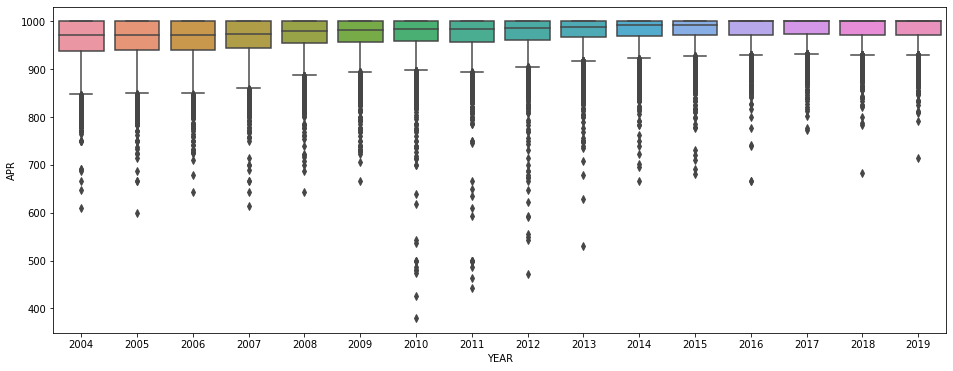

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.boxplot(data=tidy_df,x='YEAR',y='APR');

With the progress of years, the median of the APR values is moving towards 1000, which means the APRs of many schools is touching close to 1000. This improvement might be a motivation to gain more aid for each student athlete.

# Problem B.2 -- Gender comparison

Compare APRs between men’s and women’s sports. Transform your tidied dataset to create a column indicating the gender division of each sport. (You may assume sport codes 1-17 are men’s, and 18-37 are women’s.)

Visualize the distributions of APRs over time again, but broken down by gender division. How do the average APRs compare between men’s and women’s sports? Does this relationship hold true across each year?

In [63]:
import numpy as np


tidy_df['GENDER'] = np.where(tidy_df['SPORT_CODE'] <=17, 'Male', 'Female')

tidy_df

,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,YEAR,APR,GENDER
0,100654,Alabama A&M University,1,Baseball,2004,975.0,Male
1,100654,Alabama A&M University,2,Men's Basketball,2004,950.0,Male
2,100654,Alabama A&M University,4,Football,2004,871.0,Male
4,100654,Alabama A&M University,13,Men's Tennis,2004,958.0,Male
5,100654,Alabama A&M University,14,"Men's Track, Cross Country",2004,938.0,Male
...,...,...,...,...,...,...,...
96267,486840,Kennesaw State University,28,Women's Softball,2019,1000.0,Female
96268,486840,Kennesaw State University,30,Women's Soccer,2019,1000.0,Female
96269,486840,Kennesaw State University,33,Women's Tennis,2019,1000.0,Female
96270,486840,Kennesaw State University,34,"Women's Track, Cross Country",2019,1000.0,Female


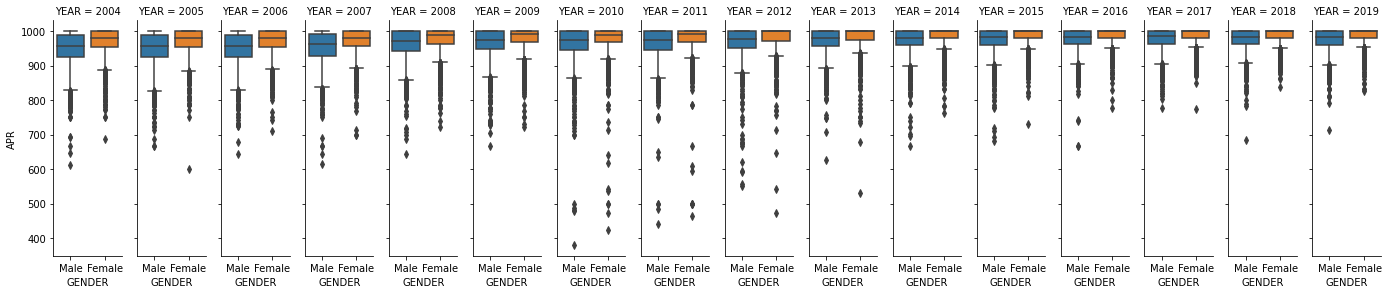

In [64]:
#using catplot
sns.catplot(x="GENDER", y="APR", col="YEAR",
                data=tidy_df, kind="box",height=4, aspect=.3);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


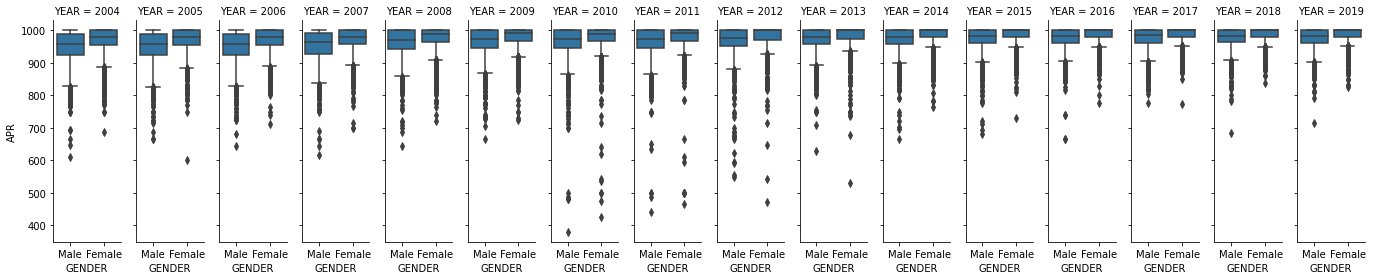

In [65]:
#using boxplot
t_grid = sns.FacetGrid(col='YEAR', data=tidy_df, height=4, aspect=.3);
t_grid.map(sns.boxplot, 'GENDER','APR');
t_grid.add_legend();

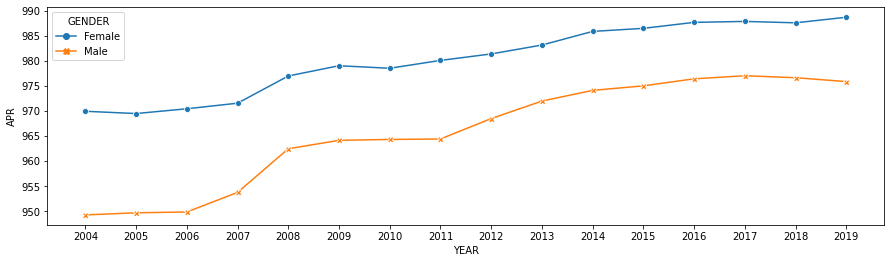

In [66]:
#linegraph for average of APRs for different years of different genders
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
mean_df=tidy_df.groupby(['GENDER','YEAR']).mean()
mean_df
sns.lineplot(data=mean_df, x="YEAR", y="APR", hue="GENDER",style="GENDER",markers=True, dashes=False);

The average APRs of Women is greater than Men for all the years from 2004 to 2019. Also for the participating women student athletes, the trend of APR is moving towards 1000, as the median is touching 1000 with years passing by. For men, the median is located between 900 and 1000, the median as the years progress is moving towards 1000 but isn't as close as compared to women.

# B.3 Men's & Women's sports

Further investigate the APRs of different men’s and women's teams. For each gender, visualize the distribution of APRs for each sport. Which sports tend to have higher and lower APRs on average?

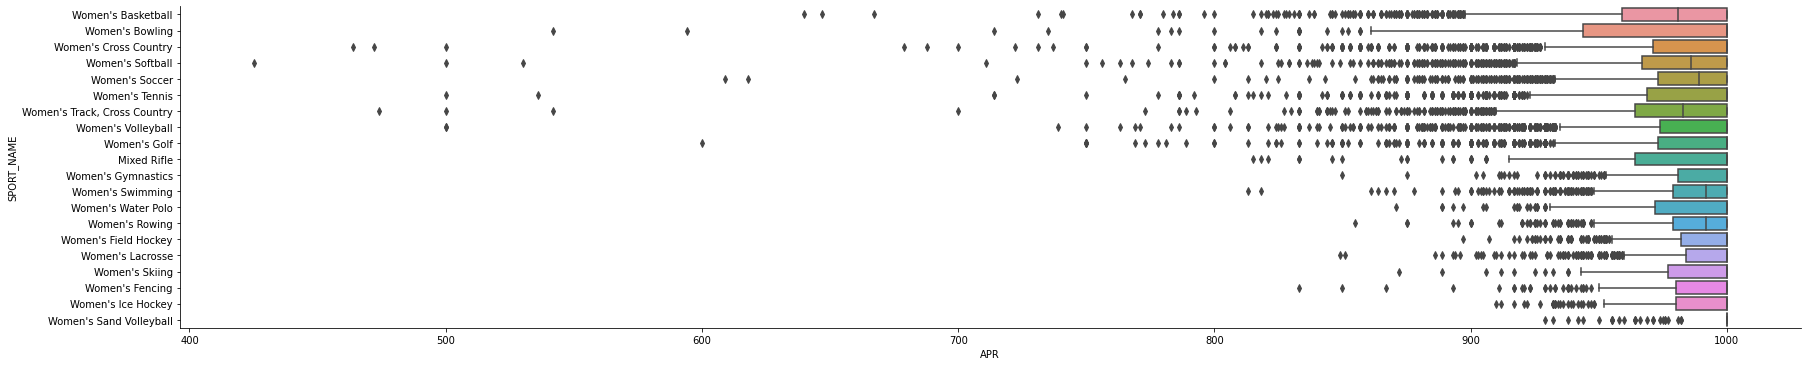

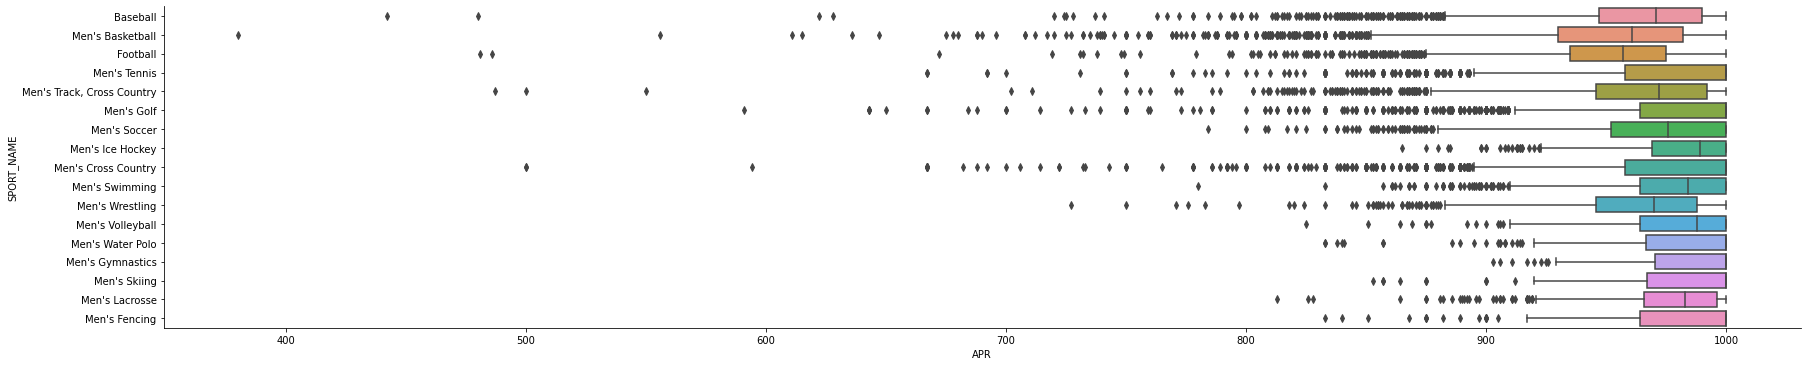

In [67]:
female_data=tidy_df[tidy_df['GENDER']=='Female']['SPORT_NAME']
sns.catplot(x='APR',y=female_data,data=tidy_df,kind='box',aspect=5);

Male_data=tidy_df[tidy_df['GENDER']=='Male']['SPORT_NAME']
sns.catplot(x='APR',y=Male_data,data=tidy_df,kind='box',aspect=5);

For Men, the higher APRs would be with Men's Gymnastics followed by Men's Water Polo and Men's Skiing. The lower APRs for Men is with the sport Football.
For Women, Women's Bowling has lowest average APR and Women's Lacrosse has highest average APR among all the sports